# **EI : Observer la Terre**

EI4 - Classification automatique de couverture de sol - 25 places - En partenariat avec Preligens (ex EarthCube)

Ce projet est l'occasion d'utiliser de l'apprentissage automatique tout en se familiarisant avec l'imagerie satellite. L'équipe de Preligens  introduira d'abord les concepts de machine learning et de télédétection pertinents, ainsi que les outils nécessaires pour la prise en main du projet. Vous appliquerez ensuite l'algorithme de votre choix pour analyser le type de couverture du sol sur des images issues de la mission Sentinel 2. Sur chaque image, il s'agira de se prononcer sur la nature de chaque pixel : est-ce un zone artificielle, cultivée, herbacée, aquatique forestière ?

**Les indices**:

NDVI: indice de végétation par différence normalisé:

$NDVI = \frac{ρ_{PIR} - ρ_R}{ρ_{PIR} + ρ_R}$

Indices de stress hydrique:

$MSI = \frac{ρ_{MIR}}{ρ_{PIR}}$

NDWI moisture index

$NDWI = \frac{ρ_{PIR} - ρ_{MIR}}{ρ_{PIR} + ρ_{MIR}}$

NDSI

$NDSI = \frac{ρ_{VIR} - ρ_{SWIR}}{ρ_{VIR} + ρ_{SWIR}}$


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tifffile as T

In [ ]:
from google.colab import files
uploaded = files.upload()

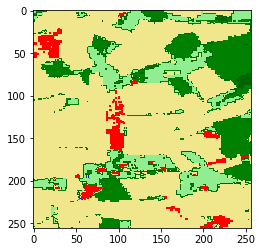

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

from tifffile import TiffFile
with TiffFile('18433.tif') as tif:
  landcover = tif.asarray()
cmap = colors.ListedColormap(['k', #nodata, absent from the dataset
                              'magenta', #clouds, very few in the dataset
                              'red', #artifical
                              'khaki', #cultivated
                              'green', #broadleaf forest
                              'darkgreen', #coniferous forest
                              'lightgreen', #herbaceous vegetation
                              'grey', #natural soil
                              'white', #permanent snow
                              'blue' ]) #water
bounds=np.arange(10)
norm= colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(landcover, cmap = cmap, norm=norm)

"\nfrom tifffile import TiffFile\nwith TiffFile('./Train/Images/9971.tif') as tif:\n    arr = tif.asarray()\n    plt.imshow(arr)\n"

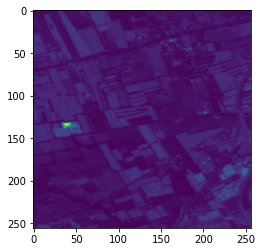

In [ ]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

raster = gdal.Open('./Train/Images/9971.tif')
R = raster.GetRasterBand(1).ReadAsArray()
G = raster.GetRasterBand(2).ReadAsArray()
B = raster.GetRasterBand(3).ReadAsArray()
img = np.array((R,G,B))

plt.imshow(img[0,:,:]+img[1,:,:]+img[2,:,:])
"""
from tifffile import TiffFile
with TiffFile('./Train/Images/9971.tif') as tif:
    arr = tif.asarray()
    plt.imshow(arr)
"""

##Test de Daphné

In [ ]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data() #à modifier

train_images = train_images / 255
test_images = test_images / 255

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class_names = ['nodata', 'clouds', 'artificial surfaces and construction​','cultivated areas​','broadleaf tree cover​','coniferous tree cover​','herbaceous vegetation​','natural material surfaces​','permanent snow-covered surfaces​','water bodies​']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Test Pierre

In [ ]:
from tifffile import TiffFile
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import os
import time as t
# meme nom dans images et masks
files_train = os.listdir("./dataset/train/images")

x_train_liste = []

y_train_liste = []

start = t.time()

for i in files_train:
    with TiffFile('./dataset/train/images/' + i) as tif:
        x_train_liste.append(tif.asarray())


    #with TiffFile('./dataset/train/masks/' + i) as tif:
  #      y_train_liste.append(tif.asarray())


x_train = np.array(x_train_liste)
y_train = np.asarray(y_train_liste)
end = t.time()
print(end-start)

#np.savetxt('x_train.txt', x_train)
#np.savetxt('y_train.txt', y_train)


In [ ]:
from tifffile import TiffFile
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import os
import time as t
import tensorflow as tf
from tensorflow import keras
import pickle




construction de x_train

In [ ]:
# meme nom dans images et masks
files_train = os.listdir("./dataset/train/images")

x_train_liste = []



start = t.time()

for i in files_train:
    with TiffFile('./dataset/train/images/' + i) as tif:
       x_train_liste.append(tif.asarray())


x_train = np.array(x_train_liste)
end = t.time()
print(end-start)

86.04987692832947


construction de y_train

In [ ]:
# meme nom dans images et masks
files_train = os.listdir("./dataset/train/images")

y_train_liste = []

start = t.time()

for i in files_train:

    with TiffFile('./dataset/train/masks/' + i) as tif:
        y_train_liste.append(tif.asarray())


y_train = np.asarray(y_train_liste)
end = t.time()
print(end-start)

11.672679901123047


construction de x_test

In [ ]:
# meme nom dans images et masks
files_train = os.listdir("./dataset/test/images")

x_test_liste = []



start = t.time()

for i in files_train:
    with TiffFile('./dataset/test/images/' + i) as tif:
       x_test_liste.append(tif.asarray())


x_test = np.array(x_test_liste)
end = t.time()
print(end-start)

8.364824056625366


construction de y_test

In [ ]:
# meme nom dans images et masks
files_train = os.listdir("./dataset/test/images")

y_test_liste = []



start = t.time()

for i in files_train:
    with TiffFile('./dataset/test/masks/' + i) as tif:
       y_test_liste.append(tif.asarray())


y_test = np.array(y_test_liste)
end = t.time()
print(end-start)

4.061224937438965


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)




(18491, 256, 256, 4)
(18491, 256, 256)
(5043, 256, 256, 4)
(5043, 256, 256)


In [ ]:
#normalisation dans [0,1] reduit la dispersion
#x_train=x_train/255
#x_test=x_test/255

: 

: 

## Définir le réseau de neurones

Pour définir chaque couche de notre réseau de neurones, on va d'abord :
- initialiser le modèle avec : `model=tf.keras.models.Sequential()` (c'est un modèle séquentiel i.e. où les couches vont s'enchaîner)
- ajouter des couches avec : `model.add(couche)`

Les couches qu'on va ajouter :
- d'abord une couche `Flatten(input_shape=(im_height,im_width,n_channels))` qui va servir à aplanir l'image en un vecteur. (n_channels= 3 si image en couleur, = 1 si image en noir et blanc)
 `input_shape=` est un argument obligatoire pour la 1ère couche du modèle, cela détermine la taille des données. Pour les couches suivantes ce n'est plus utile car la taille intermédiaire est calculée automatiquement.
 - 2 couches `Dense(nb_neurones,activation='à vous de choisir')`, ce sont les couches de neurones intermédiaires (pas besoin de refaire tous les produits matriciels horribles OMG)
 - une couche de sortie `Dense(n_classes,activation='softmax')`, on prédit un vecteur probabilités de taille `n_classes`. La fonction d'activation softmax permet d'avoir un vecteur de probabilité en sortie.

 Exemple:
 ```
  model.add(keras.layers.Dense(64,activation='relu'))
 ```
 Documentation sur comment faire un modèle séquentiel : https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
### Define the neural network
def neural_network():
    model=tf.keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=(256,256,4)))
    model.add(keras.layers.Dense(512,activation='relu'))
    model.add(keras.layers.Dense(256,activation='relu'))
    model.add(keras.layers.Dense(32,activation='softmax'))

    return model

In [ ]:
#creation du modele
model = neural_network()

In [ ]:
# Visualisez votre réseau de neurones
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 262144)            0         
                                                                 
 dense_9 (Dense)             (None, 512)               134218240 
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 32)                8224      
                                                                 
Total params: 134,357,792
Trainable params: 134,357,792
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### Define the optimizer,loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = ['accuracy']

In [ ]:
#compilation du modèle
#model.compile(opt,loss,metrics)
#gpt :
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Maintenant vous allez entrainer votre modèle sur le dataset qui comporte les images (x_train) associées à leur label (y_train). Pour cela on utilise la méthode `model.fit(...)`.

L'argument epochs correspond au nombre de fois où le dataset est présenté au réseau de neurones. Ici mettez entre 1 et 20 epochs.

L'argument validation_data sert à vérifier que votre modèle est bon sur des images qu'il n'a jamais vues (pas utilisées dans l'entrainement), i.e. qu'il n'a pas "appris" le dataset par cœur.

Documentation : https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [ ]:
history = model.fit(x_train,y_train,epochs=2,validation_data=(x_test,y_test),batch_size=40)

Epoch 1/2


ValueError: in user code:

    File "/opt/homebrew/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/opt/homebrew/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/opt/homebrew/lib/python3.10/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 256, 256) and (None, 32) are incompatible
